<a href="https://colab.research.google.com/github/decoam/ProyekSPK/blob/main/Final_Proyek_3E__2123_Deco_Akbar_Maulana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# ====================================================
# 1. IMPORT LIBRARY
# ====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Setting opsional untuk tampilan
pd.set_option('display.max_columns', None)

# ====================================================
# 2. LOAD DATASET
# ====================================================

# Karena file dataset.csv sudah muncul di panel kiri (root /content),
# cukup pakai nama filenya saja:
df = pd.read_csv('dataset.csv')      # atau: pd.read_csv('/content/dataset.csv')

print("Ukuran data:", df.shape)
df.head()
df_small = df.sample(8000, random_state=42).reset_index(drop=True)



Ukuran data: (114000, 21)


=== INFO DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  li

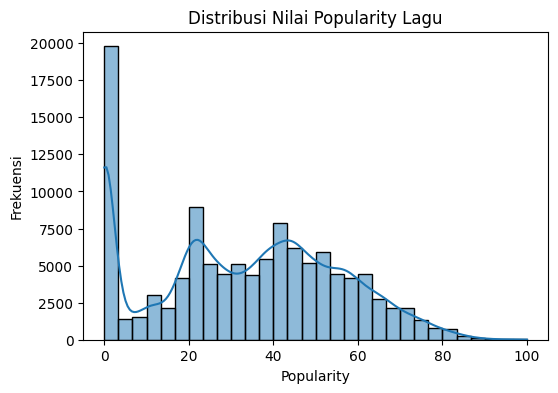

In [23]:
# ====================================================
# 3. EDA SEDERHANA (Exploratory Data Analysis)
# ====================================================

# Info tipe data
print("=== INFO DATA ===")
print(df.info())

# Cek missing values
print("\n=== MISSING VALUES SETIAP KOLOM ===")
print(df.isna().sum())

# Statistik deskriptif
print("\n=== DESKRIPTIF NUMERIK ===")
print(df.describe())

# Distribusi popularity
plt.figure(figsize=(6,4))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribusi Nilai Popularity Lagu')
plt.xlabel('Popularity')
plt.ylabel('Frekuensi')
plt.show()


In [24]:
# ====================================================
# 4. MEMBUAT KOLOM TARGET: popular_label (0/1)
# ====================================================

# Tambahkan kolom label 0/1 ke df_small
df_small['popular_label'] = (df_small['popularity'] >= 60).astype(int)

print("Distribusi kelas popular_label:")
print(df_small['popular_label'].value_counts())

print("\nPersentase:")
print(df_small['popular_label'].value_counts(normalize=True) * 100)


Distribusi kelas popular_label:
popular_label
0    6959
1    1041
Name: count, dtype: int64

Persentase:
popular_label
0    86.9875
1    13.0125
Name: proportion, dtype: float64


In [25]:
# ====================================================
# 5. PEMILIHAN FITUR & DROP KOLOM YANG TIDAK DIPAKAI
# ====================================================

drop_cols = [
    'Unnamed: 0','track_id','artists','album_name',
    'track_name','track_genre','popularity'
]

# Buat salinan dataframe awal
df_model = df_small.copy()

# Drop kolom-kolom yang tidak diperlukan
df_model = df_model.drop(columns=drop_cols, errors='ignore')

print("Kolom setelah dibersihkan:")
print(df_model.columns)

df_model.head()


Kolom setelah dibersihkan:
Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'popular_label'],
      dtype='object')


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popular_label
0,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,0
1,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,0
2,213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,0
3,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,0
4,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,0


In [26]:
# ====================================================
# 6. MENENTUKAN FITUR (X) dan LABEL (y)
# ====================================================

# Pilih fitur numerik audio yang relevan
feature_cols = [
    'duration_ms',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

# Pastikan semua kolom ada di df_model
for col in feature_cols:
    if col not in df_model.columns:
        print("Kolom hilang:", col)

X = df_model[feature_cols]
y = df_model['popular_label']

print("Shape X:", X.shape)
print("Shape y:", y.shape)
X.head()


Shape X: (8000, 10)
Shape y: (8000,)


,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,440247,0.369,0.598,-6.984,0.0304,0.00511,0.000000,0.176,0.0466,148.014
1,93933,0.171,0.997,-3.586,0.1180,0.00521,0.801000,0.420,0.0294,122.223
2,213578,0.173,0.803,-10.071,0.1440,0.61300,0.001910,0.195,0.0887,75.564
3,151387,0.683,0.511,-5.598,0.0279,0.40600,0.000197,0.111,0.5980,109.991
4,236293,0.555,0.941,-3.294,0.0481,0.48400,0.000000,0.266,0.8130,92.487


In [27]:
# ====================================================
# 7. SPLIT DATA: TRAIN & TEST
# ====================================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)


Ukuran X_train: (6400, 10)
Ukuran X_test : (1600, 10)
Ukuran y_train: (6400,)
Ukuran y_test : (1600,)


In [28]:
# ====================================================
# 8. NORMALISASI FITUR (WAJIB UNTUK KNN)
# ====================================================

scaler = StandardScaler()

# Fit hanya pada data train
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Contoh sebelum scaling:\n", X_train.iloc[0])
print("\nContoh setelah scaling:\n", X_train_scaled[0])


Contoh sebelum scaling:
 duration_ms         139159.000
danceability             0.814
energy                   0.740
loudness                -5.738
speechiness              0.145
acousticness             0.165
instrumentalness         0.000
liveness                 0.111
valence                  0.700
tempo                  138.069
Name: 2036, dtype: float64

Contoh setelah scaling:
 [-0.9685428   1.43909735  0.38876569  0.50215139  0.55303509 -0.45244989
 -0.49685915 -0.54147207  0.88215627  0.52464808]


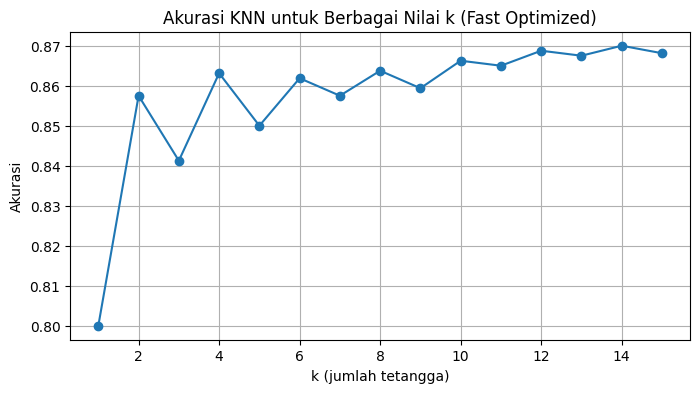

Nilai k terbaik: 14
Akurasi terbaik: 0.87


In [36]:
# ====================================================
# 09. TUNING HYPERPARAMETER: MENCARI K TERBAIK (FAST)
# ====================================================

k_values = range(1, 16)   # versi ringan: k dari 1 sampai 15
accuracies = []

for k in k_values:
    knn_k = KNeighborsClassifier(
        n_neighbors=k,
        algorithm='kd_tree',   # jauh lebih cepat daripada brute
        n_jobs=-1              # gunakan semua core CPU
    )

    knn_k.fit(X_train_scaled, y_train)
    y_pred_k = knn_k.predict(X_test_scaled)
    acc_k = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc_k)

# Plot akurasi untuk berbagai k
plt.figure(figsize=(8,4))
plt.plot(list(k_values), accuracies, marker='o')
plt.title('Akurasi KNN untuk Berbagai Nilai k (Fast Optimized)')
plt.xlabel('k (jumlah tetangga)')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

# Menentukan k terbaik
best_index = int(np.argmax(accuracies))
best_k = list(k_values)[best_index]
best_acc = accuracies[best_index]

print("Nilai k terbaik:", best_k)
print("Akurasi terbaik:", best_acc)


In [30]:
# ====================================================
# 10. TRAIN ULANG MODEL KNN DENGAN k TERBAIK (WEIGHTED)
# ====================================================

knn_best = KNeighborsClassifier(
    n_neighbors=best_k,
    algorithm='kd_tree',
    weights='distance',   # untuk menangani data imbalanced
    n_jobs=-1
)

knn_best.fit(X_train_scaled, y_train)

y_pred_best = knn_best.predict(X_test_scaled)

print("Model berhasil dilatih dengan k =", best_k)


Model berhasil dilatih dengan k = 14


In [37]:
# Akurasi model akhir
acc = accuracy_score(y_test, y_pred_best)
print(f"Akurasi Model KNN (k={best_k}): {acc:.4f}")


Akurasi Model KNN (k=14): 0.8706


Confusion Matrix:
 [[1386    6]
 [ 201    7]]


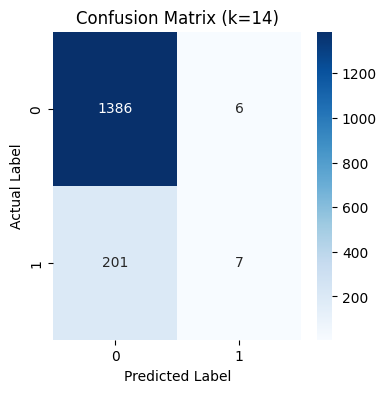

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# Plot heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (k={best_k})')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [34]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=['Tidak Populer', 'Populer']))


Classification Report:

               precision    recall  f1-score   support

Tidak Populer       0.87      1.00      0.93      1392
      Populer       0.54      0.03      0.06       208

     accuracy                           0.87      1600
    macro avg       0.71      0.51      0.50      1600
 weighted avg       0.83      0.87      0.82      1600

